In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('data1.xlsx')
for i in range(2,21):
    d=pd.read_excel('data'+str(i)+'.xlsx')
    data=pd.concat([data,d],axis=0,ignore_index=True)

In [3]:
data.shape

(1699, 4)

In [4]:
data

,Name,Comment,Label,Name (click to view profile)
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0,NaN
1,Preetom Mazumder,"Like I said, World Cup of Goalkeepers",NaN,NaN
2,Mizanur Rahman Rupok,Well played Canada 🇨🇦🇨🇦🇨🇦 bed luck..,NaN,NaN
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0,NaN
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0,NaN
...,...,...,...,...
1694,অভিশপ্ত বালক,৩ টি#AarongDairySweets #GOAL_এগোলেসেলিব্রেশন,1.0,NaN
1695,অচিন পাখি নীল আকাশ,1Goal ✅,1.0,NaN
1696,Bijle Akter,৩ টি#AarongDairySweets #GOAL_এ_গোলেসেলিব্রেশন,1.0,NaN
1697,MD Ariyan Khan,আর্জেন্টিনা 2-0 পোল্যান্ড#ArongDairySweets#Goa...,1.0,NaN


In [5]:
data.to_excel('merged_data.xlsx',index=False)

In [6]:
print("Total Comments:",len(data),
      "\nStatements:",len(data[data.Label==1]),
      "\nCriticism:",len(data[data.Label==2]),
      "\nOffensive:",len(data[data.Label==3]),
      "\nProposition:",len(data[data.Label==4]),
      "\nInterrogation:",len(data[data.Label==5]),
      "\nSarcasm:",len(data[data.Label==6]),
      "\nIrrelevant:",len(data[data.Label==7]),)

Total Comments: 1699 
Statements: 617 
Criticism: 156 
Offensive: 340 
Proposition: 23 
Interrogation: 38 
Sarcasm: 156 
Irrelevant: 28


In [7]:


# print some unprocessed reviews
sample_data = [10,100,150,200,250,600,650,666,689,640,650,700,750,800,1000]
for i in sample_data:
      print(data.Comment[i],'\n','Sentiment:-- ',data.Label[i],'\n')



বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্তুয়া 
 Sentiment:--  1.0 

তোর মত বলদ লোককে লাথি মেরে বাংলাদেশ থেকে পাঠিয়ে দেওয়া হউক 
 Sentiment:--  3.0 

ঐ দশ বছর প্লেয়ারদের চলবে না, চলবে তোগো, এইটা ডাইরেক্ট কইলেও পারতি!! 
 Sentiment:--  3.0 

7up er ভয় তাড়া করে বেড়ায় 😂😂। 
 Sentiment:--  6.0 

মানুষকে পোস্টের উপর আগ্রহী করার জন্য আবাল চো* সাংবাদিকরা কতো কৌশল ব্যবহার করে থাকে।খুজ নিলে দেখা যাবে, প্রথম আলোর এমডি আর্জেন্টিনার সাপোর্টার। 
 Sentiment:--  3.0 

akjon manus mara gase ai khane koto gula sotolok ha ha dise, Manuser hayat likhito, khela na dekle o oi lok ai somoye e mara jeto. ja Allah agey nirdharon kore disen 
 Sentiment:--  nan 

আল্লাহ্ ওনাকে জান্নাত দান করুন,, আর ওনার জীবনে ভুল ত্রুটি থাকলে মাপ করে দিন,,,,  কার কখন আবেগে আগাত লাগে কেউ জানি না,,  সবাইকে মেনে নেওয়ার ক্ষমতা দিন🤲🤲 
 Sentiment:--  1.0 

দুঃখজনক।কুমিল্লা এভাবে আলোচনায় আসলো সংবাদমাধ্যমে। 
 Sentiment:--  1.0 

আর্জেন্টিনার আযান দেওয়া নিষেধব্রাজিলেও আমাদের আজান দেওয়া নিষেধঅথচ সৌদি আরব আমাদের মুসলমান রাষ্ট্রসৌদির 

In [8]:
#drop the rows with Label==nan
data.dropna(subset=['Label'],inplace=True)

In [9]:
data.shape

(1358, 4)

In [10]:
print("Total Comments:",len(data),
      "\nStatements:",len(data[data.Label==1]),
      "\nCriticism:",len(data[data.Label==2]),
      "\nOffensive:",len(data[data.Label==3]),
      "\nProposition:",len(data[data.Label==4]),
      "\nInterrogation:",len(data[data.Label==5]),
      "\nSarcasm:",len(data[data.Label==6]),
      "\nIrrelevant:",len(data[data.Label==7]),)

Total Comments: 1358 
Statements: 617 
Criticism: 156 
Offensive: 340 
Proposition: 23 
Interrogation: 38 
Sarcasm: 156 
Irrelevant: 28


In [11]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

e:\Installation\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


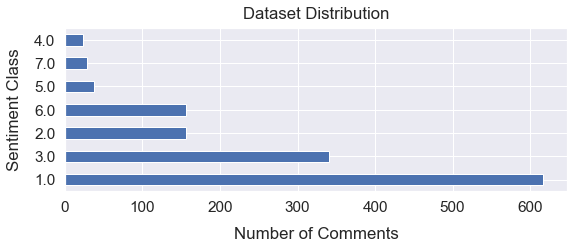

In [12]:
sns.set(font_scale=1.4)
data['Label'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 0)
plt.title("Dataset Distribution", y=1.02);

In [13]:


# Data cleaning function
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment



In [14]:
data.columns

Index(['Name', 'Comment', 'Label', 'Name (click to view profile)'], dtype='object')

In [15]:


# Apply the function into the dataframe
data['cleaned'] = data['Comment'].apply(process_comments)  

In [16]:
data.head(50)

,Name,Comment,Label,Name (click to view profile),cleaned
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0,NaN,খেললো কানাডাজিতলো লেংড়াডা
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0,NaN,৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায় তা...
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0,NaN,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...
5,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0,NaN,তবে খেলা ভালো হয়েছে
6,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0,NaN,অভিনন্দন প্রিয় বেলজিয়াম তবে আরো ভালো খেল...
7,Faysal Ahamed,ভালো খেললেই জিতা জায় না এটা তার প্রমান 😂,2.0,NaN,ভালো খেললেই জিতা জায় না এটা তার প্রমান
8,Md Kamruzzaman,যদিও ১-০ গোলে হারছে। তবুও এই কানাডা দূর্দান্ত ...,2.0,NaN,যদিও ১ ০ গোলে হারছে তবুও এই কানাডা দূর্দান্ত ...
9,Mia Ashik,২০১৮ সালের বেলজিয়ামকে খুঁজে পাচ্ছি না 🇧🇪😪বেলজি...,2.0,NaN,২০১৮ সালের বেলজিয়ামকে খুঁজে পাচ্ছি না বেলজি...
10,Zahadul Islam Parvez,বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্...,1.0,NaN,বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্...
12,M Russell Islam Raz,একটা ভালো ফিনিশারের অভাবে এত ভালো খেলেও শেষ পর...,2.0,NaN,একটা ভালো ফিনিশারের অভাবে এত ভালো খেলেও শেষ পর...


In [17]:
#length of the comments
data['length'] = data['cleaned'].apply(lambda x: len(x.split()))

In [18]:
data.head(20)

,Name,Comment,Label,Name (click to view profile),cleaned,length
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0,NaN,খেললো কানাডাজিতলো লেংড়াডা,3
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0,NaN,৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায় তা...,14
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0,NaN,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,24
5,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0,NaN,তবে খেলা ভালো হয়েছে,4
6,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0,NaN,অভিনন্দন প্রিয় বেলজিয়াম তবে আরো ভালো খেল...,10
7,Faysal Ahamed,ভালো খেললেই জিতা জায় না এটা তার প্রমান 😂,2.0,NaN,ভালো খেললেই জিতা জায় না এটা তার প্রমান,8
8,Md Kamruzzaman,যদিও ১-০ গোলে হারছে। তবুও এই কানাডা দূর্দান্ত ...,2.0,NaN,যদিও ১ ০ গোলে হারছে তবুও এই কানাডা দূর্দান্ত ...,71
9,Mia Ashik,২০১৮ সালের বেলজিয়ামকে খুঁজে পাচ্ছি না 🇧🇪😪বেলজি...,2.0,NaN,২০১৮ সালের বেলজিয়ামকে খুঁজে পাচ্ছি না বেলজি...,11
10,Zahadul Islam Parvez,বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্...,1.0,NaN,বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্...,7
12,M Russell Islam Raz,একটা ভালো ফিনিশারের অভাবে এত ভালো খেলেও শেষ পর...,2.0,NaN,একটা ভালো ফিনিশারের অভাবে এত ভালো খেলেও শেষ পর...,14


In [19]:
#count the number of comments with length equal to 0
data[data['length']==0].shape


(12, 6)

In [20]:
#drop the rows with length==0
data.drop(data[data['length']==0].index,inplace=True)

In [21]:
data.shape

(1346, 6)

In [22]:
data

,Name,Comment,Label,Name (click to view profile),cleaned,length
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0,NaN,খেললো কানাডাজিতলো লেংড়াডা,3
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0,NaN,৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায় তা...,14
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0,NaN,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,24
5,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0,NaN,তবে খেলা ভালো হয়েছে,4
6,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0,NaN,অভিনন্দন প্রিয় বেলজিয়াম তবে আরো ভালো খেল...,10
...,...,...,...,...,...,...
1693,Tofayel Ahmad Sabuj,৩ টি,1.0,NaN,৩ টি,2
1694,অভিশপ্ত বালক,৩ টি#AarongDairySweets #GOAL_এগোলেসেলিব্রেশন,1.0,NaN,৩ টি এগোলেসেলিব্রেশন,3
1696,Bijle Akter,৩ টি#AarongDairySweets #GOAL_এ_গোলেসেলিব্রেশন,1.0,NaN,৩ টি এ গোলেসেলিব্রেশন,4
1697,MD Ariyan Khan,আর্জেন্টিনা 2-0 পোল্যান্ড#ArongDairySweets#Goa...,1.0,NaN,আর্জেন্টিনা পোল্যান্ড ...,3


In [23]:
data.reset_index(drop=True,inplace=True)
data

,Name,Comment,Label,Name (click to view profile),cleaned,length
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0,NaN,খেললো কানাডাজিতলো লেংড়াডা,3
1,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0,NaN,৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায় তা...,14
2,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0,NaN,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,24
3,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0,NaN,তবে খেলা ভালো হয়েছে,4
4,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0,NaN,অভিনন্দন প্রিয় বেলজিয়াম তবে আরো ভালো খেল...,10
...,...,...,...,...,...,...
1341,Tofayel Ahmad Sabuj,৩ টি,1.0,NaN,৩ টি,2
1342,অভিশপ্ত বালক,৩ টি#AarongDairySweets #GOAL_এগোলেসেলিব্রেশন,1.0,NaN,৩ টি এগোলেসেলিব্রেশন,3
1343,Bijle Akter,৩ টি#AarongDairySweets #GOAL_এ_গোলেসেলিব্রেশন,1.0,NaN,৩ টি এ গোলেসেলিব্রেশন,4
1344,MD Ariyan Khan,আর্জেন্টিনা 2-0 পোল্যান্ড#ArongDairySweets#Goa...,1.0,NaN,আর্জেন্টিনা পোল্যান্ড ...,3


In [24]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Label==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Label==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Label==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

In [25]:
#call the fucntion
documents,words,u_words,class_names = data_summary(data)


Class Name :  1.0
Number of Documents:606
Number of Words:5040
Number of Unique Words:1757
Most Frequent Words:

টি	98
১৬	85
এ	80
বার	80
গোলে	71
সেলিব্রেশন	71
এগোলেসেলিব্রেশন	63
না	62
টাকা	58
তুমি	50

Class Name :  3.0
Number of Documents:340
Number of Words:3399
Number of Unique Words:1680
Most Frequent Words:

না	54
আর	43
করে	42
কি	32
হয়	24
ব্রাজিল	22
গেলে	20
এই	19
আর্জেন্টিনা	18
তো	17

Class Name :  2.0
Number of Documents:156
Number of Words:2724
Number of Unique Words:1251
Most Frequent Words:

না	56
ভালো	36
করে	24
আর	24
অঘটন	24
খেলা	23
এটা	23
কানাডা	17
জন্য	17
সৌদি	17

Class Name :  6.0
Number of Documents:155
Number of Words:1636
Number of Unique Words:910
Most Frequent Words:

না	32
করে	21
আর	20
কি	13
মনে	13
ব্রাজিল	12
আর্জেন্টিনার	11
আর্জেন্টিনা	11
করতে	11
থেকে	10

Class Name :  5.0
Number of Documents:38
Number of Words:313
Number of Unique Words:217
Most Frequent Words:

কি	19
দল	5
ভাই	5
আর	5
কোনো	4
না	4
তো	4
অভিনয়	4
এসব	3
প্রথম	3

Class Name :  7.0
Number of Documents:28
N

In [26]:
def information(data):
    labels=set(data.Label)
    print(labels)
    documents = []
    words = []
    u_words = []
    for label in labels:
        print(label,':',len(data[data.Label==label]))
        comments=data[data.Label==label].cleaned
        documents.append(len(comments))
        # unique_words=[]
        # for comment in comments:
        #     for word in comment.strip().split():
        #         if(word not in unique_words):
        #             unique_words.append(word)
        # print('Unique words:',len(unique_words))
        unique_words=set()
        total_words=0
        all_words=[]
        for comment in comments:
            for word in comment.strip().split():
                total_words+=1
                all_words.append(word)
                unique_words.add(word)
        print('Unique words:',len(unique_words))
        u_words.append(len(np.unique(all_words)))
        print('Total words:',total_words)
        words.append(total_words)
        print('Average words per comment:',total_words/len(comments))
        #list of tuples
        most_freq_words=pd.value_counts(np.array(all_words))
        print('Most frequent words:\n',most_freq_words[:10]) 
    return documents,words,u_words,list(labels)      
    

documents,words,u_words,labels=information(data)

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}
1.0 : 606
Unique words: 1757
Total words: 5040
Average words per comment: 8.316831683168317
Most frequent words:
 টি                 98
১৬                 85
বার                80
এ                  80
সেলিব্রেশন         71
গোলে               71
এগোলেসেলিব্রেশন    63
না                 62
টাকা               58
তুমি               50
dtype: int64
2.0 : 156
Unique words: 1251
Total words: 2724
Average words per comment: 17.46153846153846
Most frequent words:
 না        56
ভালো      36
অঘটন      24
করে       24
আর        24
খেলা      23
এটা       23
জন্য      17
কানাডা    17
সৌদি      17
dtype: int64
3.0 : 340
Unique words: 1680
Total words: 3399
Average words per comment: 9.99705882352941
Most frequent words:
 না             54
আর             43
করে            42
কি             32
হয়             24
ব্রাজিল        22
গেলে           20
এই             19
আর্জেন্টিনা    18
মেসি           17
dtype: int64
4.0 : 23
Unique words: 357
Total words: 463
Average wo

In [27]:
documents

[606, 156, 340, 23, 38, 155, 28]

In [28]:
labels

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

In [29]:
words

[5040, 2724, 3399, 463, 313, 1636, 1047]

In [30]:
u_words

[1757, 1251, 1680, 357, 217, 910, 694]

In [31]:
Info_df=pd.DataFrame({'Labels':labels,'Documents':documents,'Words':words,'Unique Words':u_words})
Info_df

,Labels,Documents,Words,Unique Words
0,1.0,606,5040,1757
1,2.0,156,2724,1251
2,3.0,340,3399,1680
3,4.0,23,463,357
4,5.0,38,313,217
5,6.0,155,1636,910
6,7.0,28,1047,694


<AxesSubplot:xlabel='Labels'>

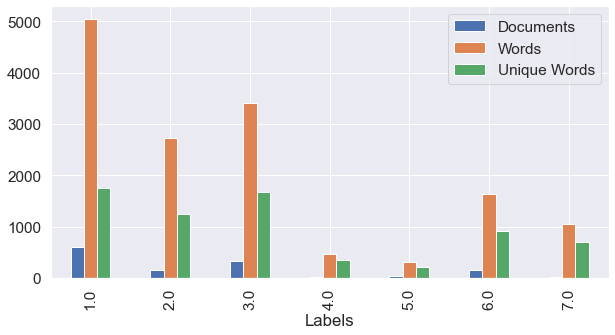

In [32]:
Info_df.plot.bar(x='Labels',y=['Documents','Words','Unique Words'],figsize=(10,5))

In [33]:
dataset=data

# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

In [34]:
frequency

{3: 158,
 14: 31,
 24: 11,
 4: 171,
 10: 40,
 8: 74,
 71: 1,
 11: 56,
 7: 87,
 19: 11,
 20: 14,
 1: 58,
 5: 111,
 6: 89,
 13: 34,
 15: 17,
 9: 58,
 21: 10,
 23: 17,
 22: 6,
 47: 1,
 35: 4,
 18: 16,
 2: 109,
 41: 1,
 16: 18,
 30: 4,
 12: 29,
 28: 9,
 31: 9,
 27: 8,
 26: 6,
 17: 13,
 29: 4,
 25: 3,
 97: 1,
 32: 2,
 38: 3,
 50: 1,
 33: 3,
 52: 2,
 86: 2,
 153: 3,
 34: 6,
 42: 2,
 40: 1,
 282: 1,
 36: 4,
 45: 1,
 55: 1,
 62: 2,
 105: 1,
 80: 1,
 199: 1,
 107: 1,
 74: 1,
 147: 1,
 37: 2,
 51: 2,
 44: 1,
 61: 1,
 46: 2,
 115: 1,
 54: 1,
 178: 1,
 58: 1,
 137: 1,
 70: 1,
 87: 2,
 77: 1}

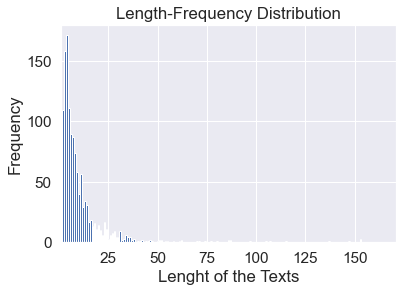

In [35]:
plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, max(frequency.values()))
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()    

In [36]:
sorted_freq=sorted(frequency.items(), key=lambda x: x[1], reverse=True)
sorted_freq

[(4, 171),
 (3, 158),
 (5, 111),
 (2, 109),
 (6, 89),
 (7, 87),
 (8, 74),
 (1, 58),
 (9, 58),
 (11, 56),
 (10, 40),
 (13, 34),
 (14, 31),
 (12, 29),
 (16, 18),
 (15, 17),
 (23, 17),
 (18, 16),
 (20, 14),
 (17, 13),
 (24, 11),
 (19, 11),
 (21, 10),
 (28, 9),
 (31, 9),
 (27, 8),
 (22, 6),
 (26, 6),
 (34, 6),
 (35, 4),
 (30, 4),
 (29, 4),
 (36, 4),
 (25, 3),
 (38, 3),
 (33, 3),
 (153, 3),
 (32, 2),
 (52, 2),
 (86, 2),
 (42, 2),
 (62, 2),
 (37, 2),
 (51, 2),
 (46, 2),
 (87, 2),
 (71, 1),
 (47, 1),
 (41, 1),
 (97, 1),
 (50, 1),
 (40, 1),
 (282, 1),
 (45, 1),
 (55, 1),
 (105, 1),
 (80, 1),
 (199, 1),
 (107, 1),
 (74, 1),
 (147, 1),
 (44, 1),
 (61, 1),
 (115, 1),
 (54, 1),
 (178, 1),
 (58, 1),
 (137, 1),
 (70, 1),
 (77, 1)]

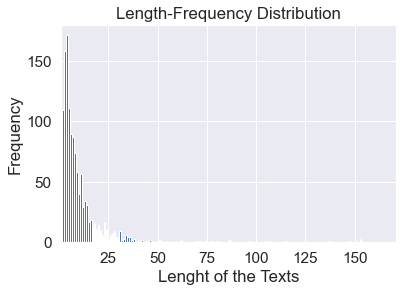

In [37]:
plt.bar( [key for (key, val) in sorted_freq], [val for (key, val) in sorted_freq], align='center')
plt.xlim(1, max(frequency.values()))
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show() 

# Dataset Splitting

In [38]:
def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [39]:


dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

# Model Building Using Machine Learning Feature Extraction Using TF-IDF

In [40]:
#======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================
            
def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [41]:


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve



In [42]:
#============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination(): 
    """
    This function consists the models defination for All gram Features
    
    Retuns:
        ml_models: list of models
        model_names: list of model_names
    
    """
    
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 

In [43]:
def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='micro'),4)*100 
    
    return my_dict 

In [44]:
def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.
    
    Args:
        performance_dict: a dictionary of all the parameters for each models
        
    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [45]:
#==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels


# Model Training


In [46]:
## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Label,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(f'./{gram_names[i]}_performance.json', 'w') as fp:
        json.dump(accuracy, fp)

Feature Size :======> 4411

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1346 
	Training		 1211 
	Test			 135
Feature Size :======> 15372

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1346 
	Training		 1211 
	Test			 135
Feature Size :======> 26270

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 1346 
	Training		 1211 
	Test			 135


In [47]:


# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(f'./{gram}_performance.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")




========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     48.89      48.89   48.89     48.89          LR
1     46.67      46.67   46.67     46.67          DT
2     50.37      50.37   50.37     50.37          RF
3     49.63      49.63   49.63     49.63         MNB
4     48.89      48.89   48.89     48.89         KNN
5     36.30      36.30   36.30     36.30  Linear SVM
6     40.74      40.74   40.74     40.74     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by RF at = 50.370000000000005
Highest F1-Score achieved by RF at = 50.370000000000005
Highest Precision Score achieved by RF at = 50.370000000000005
Highest Recall Score achieved by RF at = 50.370000000000005

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     45.93      45.93   45.93     45.93          LR
1     46.67      46.67   46.67     46.67          DT
2     42.96      42

# Performance Visualization


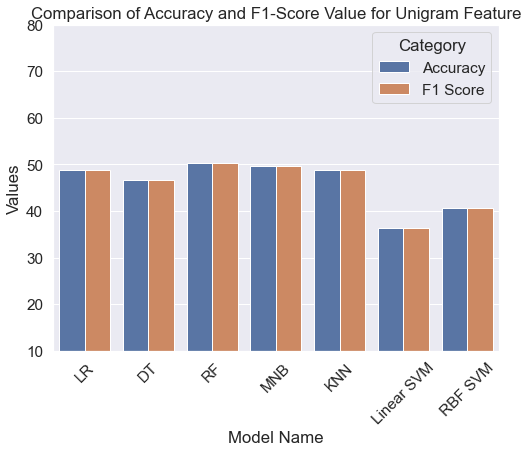

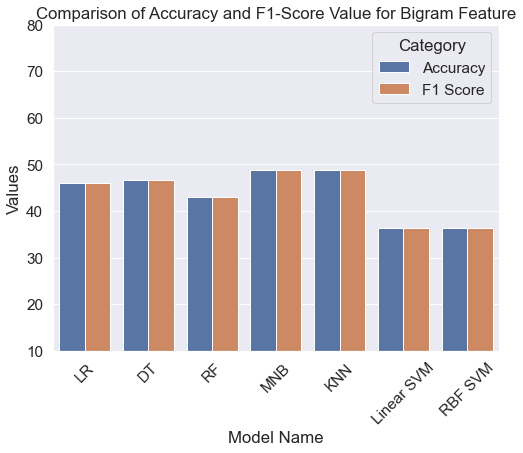

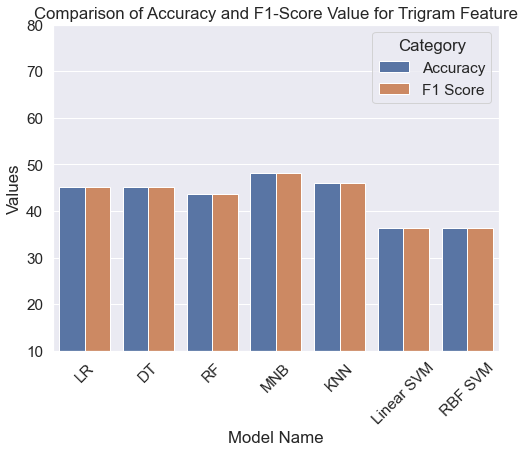

In [48]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(f'./{gram}_performance.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);